Introduction

To predict count of bike sharing demand
By evaluating performance of different regression models using Root Mean Squared Logarithmic Error
then select the most accurate model that best captures the underlying relationships within the data. 

In [1]:
import numpy as np 
import pandas as pd 

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_log_error, make_scorer

# Machine Learning Models
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor

In [3]:
train = pd.read_csv(r'C:\Users\User\Desktop\bike_ride\kaggle\train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test = pd.read_csv(r'C:\Users\User\Desktop\bike_ride\kaggle\test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1/20/2011 0:00,1,0,1,1,10.66,11.365,56,26.0027
1,1/20/2011 1:00,1,0,1,1,10.66,13.635,56,0.0000
2,1/20/2011 2:00,1,0,1,1,10.66,13.635,56,0.0000
3,1/20/2011 3:00,1,0,1,1,10.66,12.880,56,11.0014
4,1/20/2011 4:00,1,0,1,1,10.66,12.880,56,11.0014


In [17]:
# train.shape
# Seeing if there are dublicated.
train.duplicated().sum()
# train.isna().sum()

0

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  object        
 14  day         10886 non-null  object        
 15  hour        10886 non-null  int32         
dtypes: datetime64[ns](1), 

In [7]:
# Convert the 'datetime' column to datetime format
train['datetime'] = pd.to_datetime(train['datetime'])

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


Data Preparation

In [9]:
# Extract the year from the 'datetime' column and create a new 'year' column
train['year'] = train['datetime'].dt.year

# Extract the month as its name from the 'datetime' column and create a new 'month' column
train['month'] = train['datetime'].dt.month_name()

# Extract the day as its name from the 'datetime' column and create a new 'day' column
train['day'] = train['datetime'].dt.day_name()

# Extract the hour from the 'datetime' column and create a new 'hour' column
train['hour'] = train['datetime'].dt.hour

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,January,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,January,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,January,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,January,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,January,Saturday,4


To improve data clarity and interpretation, we replaced numerical values in certain columns with corresponding descriptive strings. This process facilitates a more intuitive understanding of the dataset's categorical attributes and makes it more accessible for analysis and interpretation. 

In [19]:
# Replace the values in the 'season' column with corresponding strings
train['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)

# Replace the values in the 'holiday' column with corresponding strings
train['holiday'].replace({1: 'Holiday', 0: 'Not Holiday'}, inplace=True)

# Replace the values in the 'workingday' column with corresponding strings
train['workingday'].replace({1: 'Workingday', 0: 'Not Workingday'}, inplace=True)

# Replace the values in the 'weather' column with corresponding strings
train['weather'].replace({1: 'Clear', 2: 'Mist', 3: 'Rain', 4: 'Snow'}, inplace=True)

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,81,0.0,3,13,16,2011,January,Saturday,0
1,2011-01-01 01:00:00,Spring,Not Holiday,Not Workingday,Clear,9.02,13.635,80,0.0,8,32,40,2011,January,Saturday,1
2,2011-01-01 02:00:00,Spring,Not Holiday,Not Workingday,Clear,9.02,13.635,80,0.0,5,27,32,2011,January,Saturday,2
3,2011-01-01 03:00:00,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,75,0.0,3,10,13,2011,January,Saturday,3
4,2011-01-01 04:00:00,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,75,0.0,0,1,1,2011,January,Saturday,4


Check categorical repeated value count 

In [13]:
# Categorical columns.
categorical_features = train[['season', 'holiday', 'workingday', 'weather',  'year', 'month', 'day', 'hour']]

for i in categorical_features:
    print(train[i].value_counts())
    print('-' * 50)

season
Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: count, dtype: int64
--------------------------------------------------
holiday
Not Holiday    10575
Holiday          311
Name: count, dtype: int64
--------------------------------------------------
workingday
Workingday        7412
Not Workingday    3474
Name: count, dtype: int64
--------------------------------------------------
weather
Clear    7192
Mist     2834
Rain      859
Snow        1
Name: count, dtype: int64
--------------------------------------------------
year
2012    5464
2011    5422
Name: count, dtype: int64
--------------------------------------------------
month
May          912
June         912
July         912
August       912
December     912
October      911
November     911
April        909
September    909
February     901
March        901
January      884
Name: count, dtype: int64
--------------------------------------------------
day
Saturday     1584
Sunday       1579
Thursday     1553
M

replace weather snow with rain value

In [22]:
# Define a mapping dictionary to combine the clusters
cluster_mapping = {"Snow" : "Rain"}

# Update the "grade" column with the new cluster labels
train['weather'] = train['weather'].replace(cluster_mapping)

# Check the value_counts for the weather after replacing
train['weather'].value_counts()

weather
Clear    7192
Mist     2834
Rain      860
Name: count, dtype: int64

In [35]:
# # Filter rows where 'workingday' is equal to 'Workingday'
# workingDay = train[train['workingday'] == 'Workingday']

# # Filter rows where 'holiday' is equal to 'Holiday'
# holiDay = train[train['holiday'] == 'Holiday']

# # Filter rows where 'holiday' is not 'Holiday' and 'workingday' is not 'Workingday'
# weekEnd = train[(train['holiday'] == 'Not Holiday') & (train['workingday'] == 'Not Workingday')]

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,81.0,6.0032,3,13,16,2011,January,Saturday,0
1,2011-01-01 01:00:00,Spring,Not Holiday,Not Workingday,Clear,9.02,13.635,80.0,6.0032,8,32,40,2011,January,Saturday,1
2,2011-01-01 02:00:00,Spring,Not Holiday,Not Workingday,Clear,9.02,13.635,80.0,6.0032,5,27,32,2011,January,Saturday,2
3,2011-01-01 03:00:00,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,75.0,6.0032,3,10,13,2011,January,Saturday,3
4,2011-01-01 04:00:00,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,75.0,6.0032,0,1,1,2011,January,Saturday,4


In [46]:
# Numerical columns.
numerical_features = train[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]

# calculate descriptive statistics for numerical values.
numerical_features.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,62.050856,13.802767,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.062237,7.045744,49.960477,151.039033,181.144454
min,0.82000,0.760000,8.000000,6.003200,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,78.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [47]:
# Filter rows where the weather is 'Rain'
rain_weather = train[train['weather'] == 'Rain']

# Calculate the mean humidity for rows with 'Rain' weather
mean_rain_weather_humidity = rain_weather['humidity'].mean()

# Replace 0 values in the 'humidity' column with the calculated mean for 'Rain' weather
train['humidity'] = train['humidity'].replace(0, mean_rain_weather_humidity)

# Check the minimum value in the 'humidity' column after replacing 0 values
train['humidity'].min()

8.0

In [48]:
# Get the count of the minimum value
count_of_min_value = train[train['windspeed']==0].shape[0]

count_of_min_value

0

In [49]:
# Filter rows with the minimum value
min_value_rows = train[train['windspeed'] > 0]

min_value_rows.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
4433,2011-10-16 18:00:00,Winter,Not Holiday,Not Workingday,Clear,22.96,26.515,49.0,30.0026,102,226,328,2011,October,Sunday,18
10356,2012-11-16 22:00:00,Winter,Not Holiday,Workingday,Clear,13.12,15.150,53.0,16.9979,23,139,162,2012,November,Friday,22
2043,2011-05-12 01:00:00,Summer,Not Holiday,Workingday,Clear,18.86,22.725,88.0,15.0013,1,16,17,2011,May,Thursday,1
5367,2011-12-17 17:00:00,Winter,Not Holiday,Not Workingday,Clear,10.66,12.880,48.0,15.0013,12,153,165,2011,December,Saturday,17
2694,2011-07-01 04:00:00,Fall,Not Holiday,Workingday,Clear,25.42,31.060,57.0,12.9980,1,5,6,2011,July,Friday,4
9278,2012-09-09 23:00:00,Fall,Not Holiday,Not Workingday,Clear,22.96,26.515,52.0,19.0012,22,70,92,2012,September,Sunday,23
5984,2012-02-05 13:00:00,Spring,Not Holiday,Not Workingday,Mist,11.48,13.635,61.0,11.0014,33,241,274,2012,February,Sunday,13
4069,2011-10-01 14:00:00,Winter,Not Holiday,Not Workingday,Mist,17.22,21.210,71.0,23.9994,33,147,180,2011,October,Saturday,14
8154,2012-07-01 03:00:00,Fall,Not Holiday,Not Workingday,Clear,29.52,35.605,84.0,8.9981,6,27,33,2012,July,Sunday,3
685,2011-02-11 21:00:00,Spring,Not Holiday,Workingday,Clear,8.20,10.605,59.0,8.9981,1,46,47,2011,February,Friday,21


In [52]:
# Replace zero 'windspeed with the values above or below
train['windspeed'] = train['windspeed'].replace(0, method='ffill').replace(0, method='bfill')

# Check the minimum value in the 'windspeed' column after replacing 0 values
train['windspeed'].min()

C:\Users\User\AppData\Local\Temp\ipykernel_5380\1292518881.py:2: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  train['windspeed'] = train['windspeed'].replace(0, method='ffill').replace(0, method='bfill')


6.0032

Correlation Matrix to use for analyze the relationship between numerical features. 
-Positive correlations are represented by values closer to 1 (brighter colors red).
-Negative correlations are represented by values closer to -1 (darker colors blue).
-Variables with no significant correlation will have values closer to 0 (neutral colors).

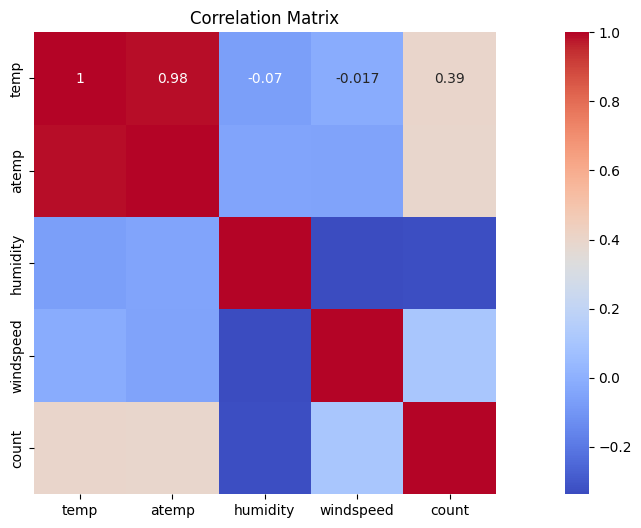

In [44]:
# Calculate the correlation matrix for the selected numerical features in the 'data' DataFrame.
correlation_matrix = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

1) A high correlation 0.98 between the temp and atemp. To remove one of them because the two feature act as one feature. 
2) Temp and humidity with a weak correlation with count, but there is no correlation between windspeed and count. (0.1)

In [79]:
# weekEnd.shape
# workingDay.shape
holiDay.shape

(311, 16)

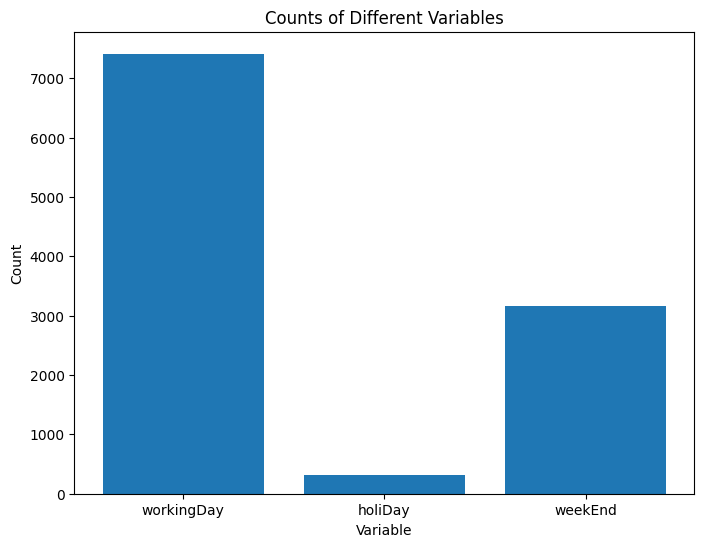

In [90]:
counts = [workingDay.shape[0],holiDay.shape[0],weekEnd.shape[0]]
labels = ['workingDay','holiDay','weekEnd']

plt.figure(figsize=(8,6))
plt.bar(labels,counts)
plt.xlabel('Variable')
plt.ylabel('Count')
plt.title('Counts of Different Variables')
plt.show()

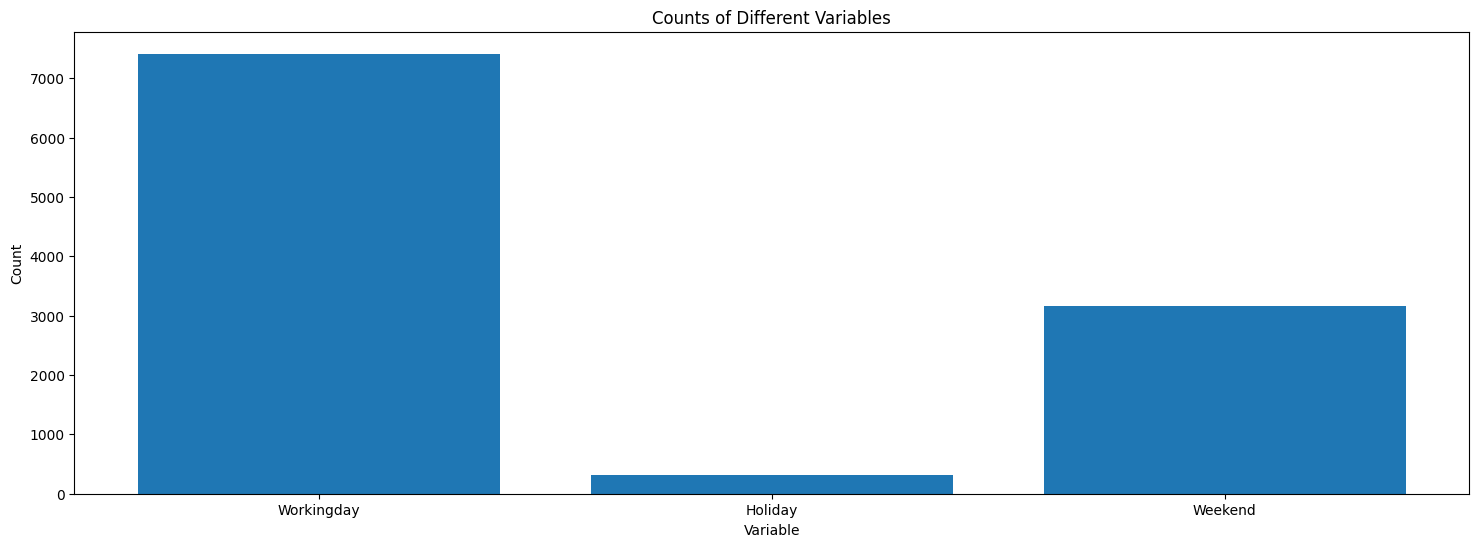

In [64]:
# Calculate counts
counts = [workingDay.shape[0], holiDay.shape[0], weekEnd.shape[0]]
labels = ['Workingday', 'Holiday', 'Weekend']

# Create a bar chart
plt.figure(figsize=(18, 6))
plt.bar(labels, counts)
plt.xlabel('Variable')
plt.ylabel('Count')
plt.title('Counts of Different Variables')
plt.show()

c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

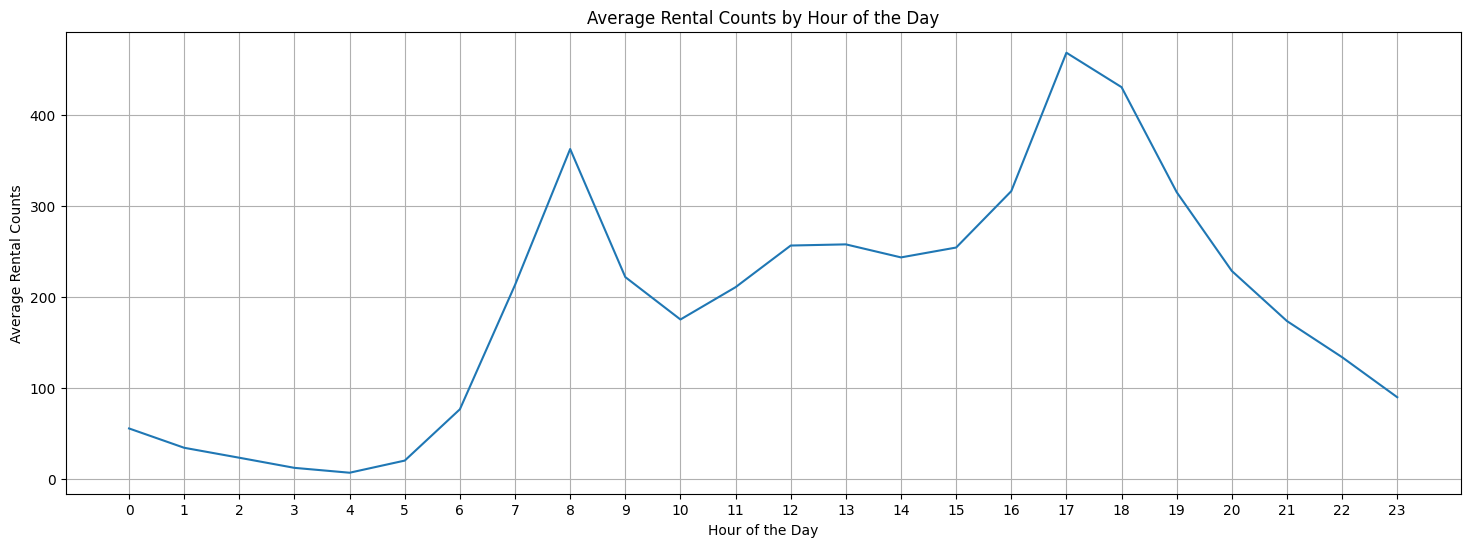

In [99]:
# Calculate the average rental counts by hour of the day
hourly_counts = train.groupby('hour')['count'].mean().reset_index()
hourly_counts.head(24)


# Create a line plot to visualize the average rental counts by hour
plt.figure(figsize=(18, 6))
sns.lineplot(x='hour', y='count', data=hourly_counts)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rental Counts')
plt.title('Average Rental Counts by Hour of the Day')
plt.xticks(ticks=range(24), labels=range(24))

plt.grid()
plt.show()


c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

Text(0, 0.5, 'Mean Count')

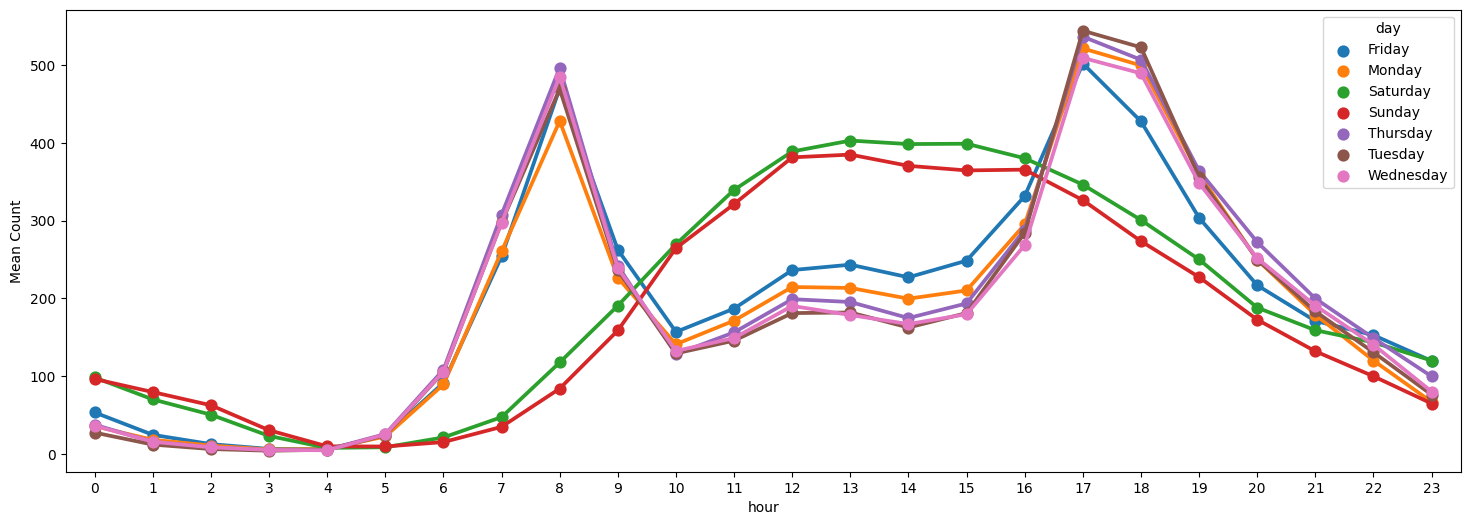

In [98]:
# Plot the mean rental counts per hour based on day of the week
plt.figure(figsize=(18, 6))
hour_day_df = train.groupby(["hour", "day"])["count"].mean().to_frame().reset_index()
ax1 = sns.pointplot(x=hour_day_df["hour"], y=hour_day_df["count"], hue=hour_day_df["day"])
ax1.set_ylabel("Mean Count")

c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

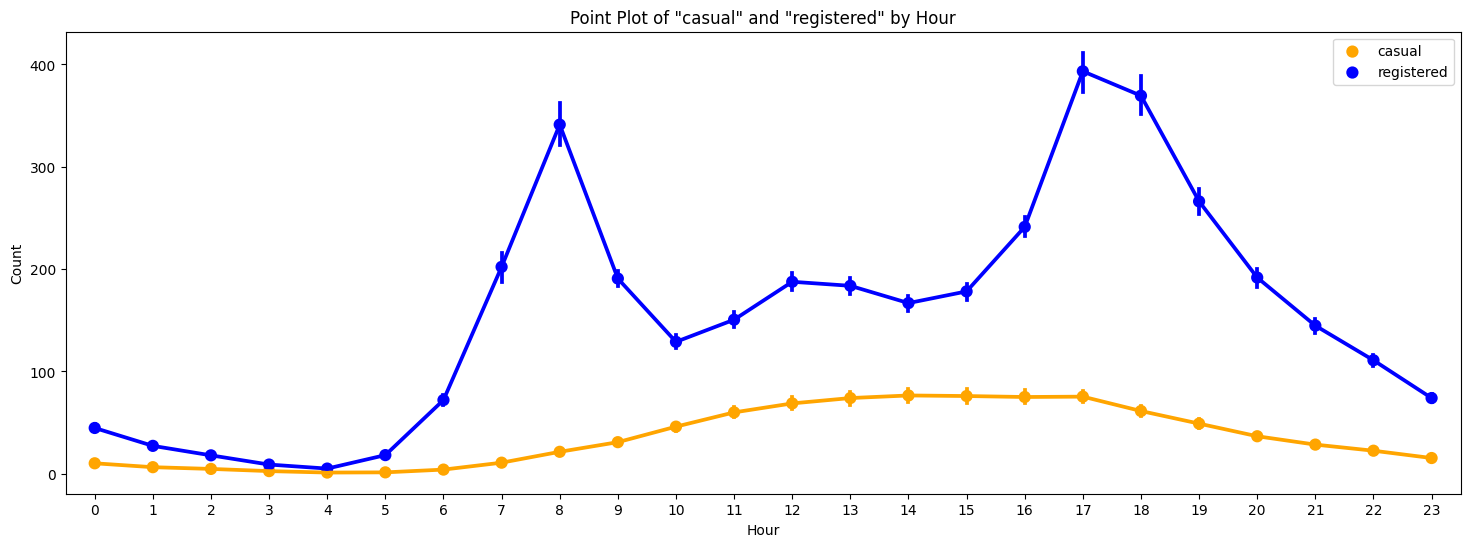

In [61]:
# Set up the plot
plt.figure(figsize=(18, 6))

# Create a point plot for 'casual' and 'registered' by 'hour'
sns.pointplot(data=train, x='hour', y='casual', color='orange', label='casual')
sns.pointplot(data=train, x='hour', y='registered', color='blue', label='registered')

plt.title('Point Plot of "casual" and "registered" by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()

plt.show()

c:\Users\User\Desktop\data_rapid\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\data_rapid\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\data_rapid\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\data_rapid\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

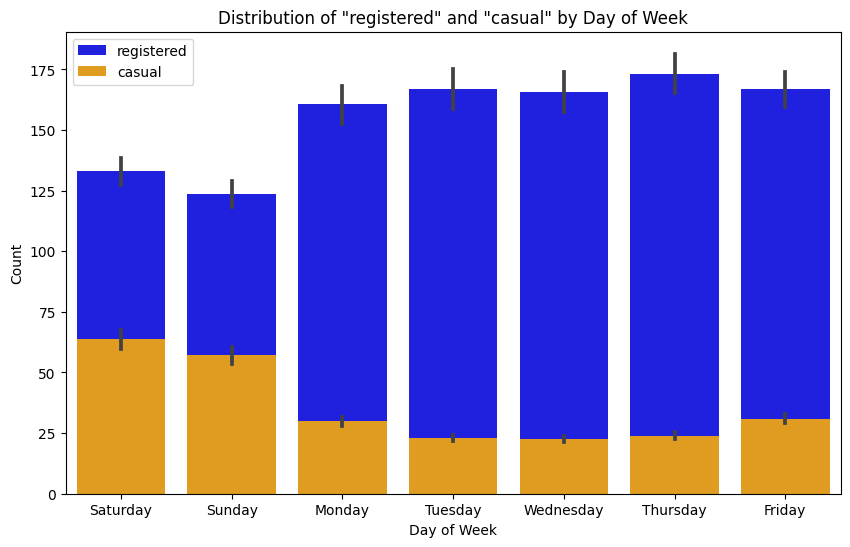

In [88]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Create a bar plot to visualize distribution of 'registered' and 'casual' by 'day'
sns.barplot(data=train, x='day', y='registered', color='blue', label='registered')
sns.barplot(data=train, x='day', y='casual', color='orange', label='casual')

plt.title('Distribution of "registered" and "casual" by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend()

plt.show()

c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dty

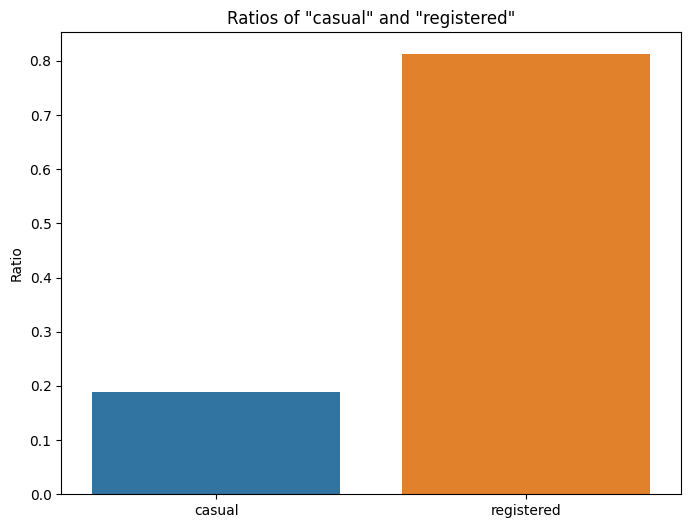

In [100]:
# Calculate the total counts for 'casual' and 'registered'
total_casual = train['casual'].sum()
total_registered = train['registered'].sum()

# Calculate the ratios
ratio_casual = total_casual / (total_casual + total_registered)
ratio_registered = total_registered / (total_casual + total_registered)

# Create a bar plot for the ratios of 'casual' and 'registered'
ratios = [ratio_casual, ratio_registered]
labels = ['casual', 'registered']

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=ratios)
plt.title('Ratios of "casual" and "registered"')
plt.ylabel('Ratio')
plt.show()

c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

Text(0, 0.5, 'Mean Count')

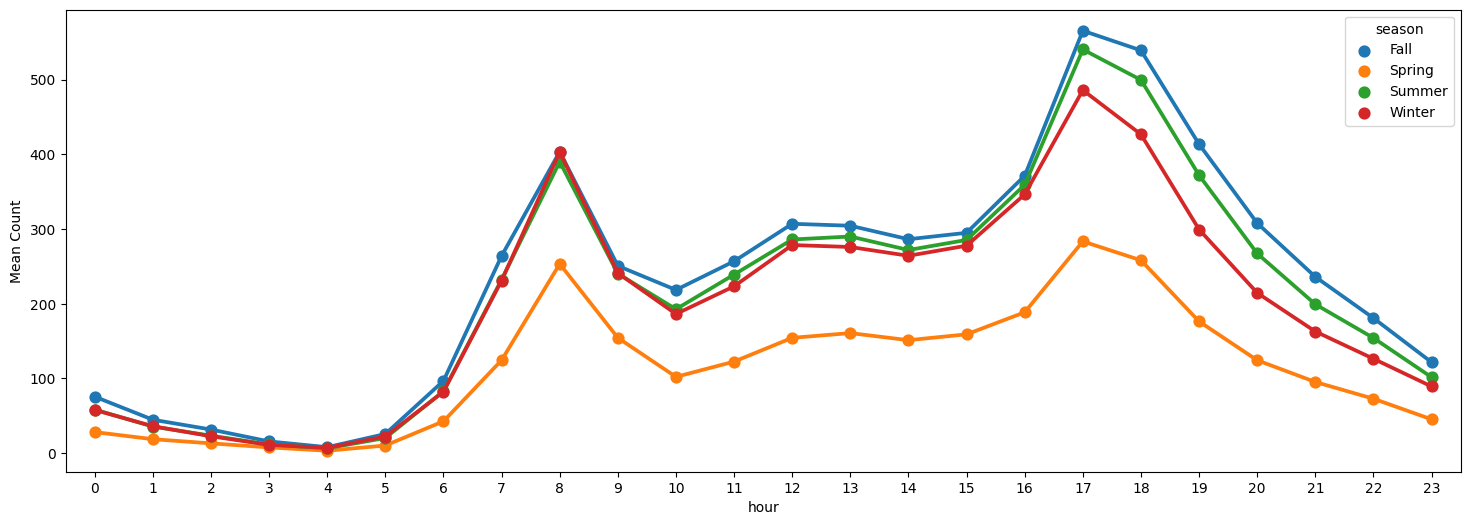

In [101]:
# Plot the mean rental counts per hour based on season
plt.figure(figsize=(18, 6))
hour_season_df = train.groupby(["hour", "season"])["count"].mean().to_frame().reset_index()
ax2 = sns.pointplot(x=hour_season_df["hour"], y=hour_season_df["count"], hue=hour_season_df["season"])
ax2.set_ylabel("Mean Count")

c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

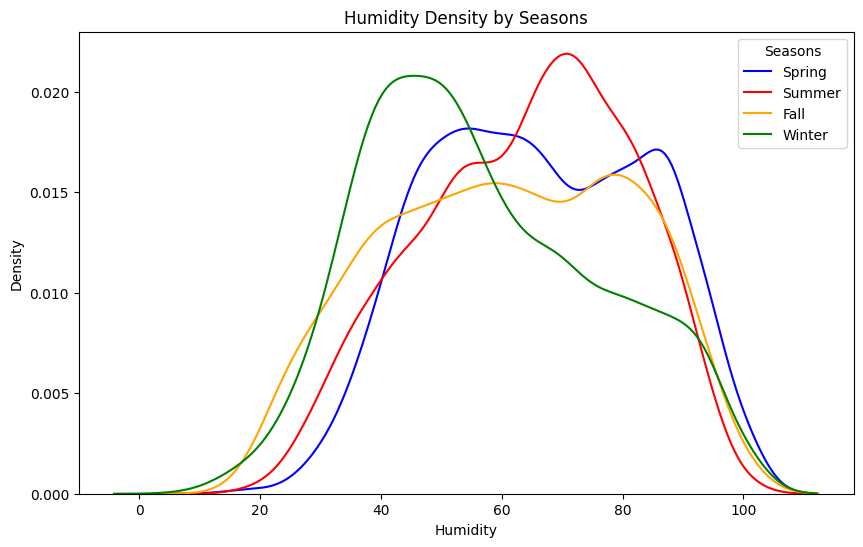

In [102]:
# Define custom colors for each season
season_colors = {
    'Spring': 'green',
    'Summer': 'orange',
    'Fall': 'red',
    'Winter': 'blue'
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Create a kernel density plot of humidity by season with custom colors
sns.kdeplot(data=train, x='humidity', hue='season', common_norm=False, palette=season_colors.values())
plt.title('Humidity Density by Seasons')
plt.xlabel('Humidity')
plt.ylabel('Density')
plt.legend(title='Seasons', labels=season_colors.keys())

plt.show()

c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\Desktop\bike_ride\prj_venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

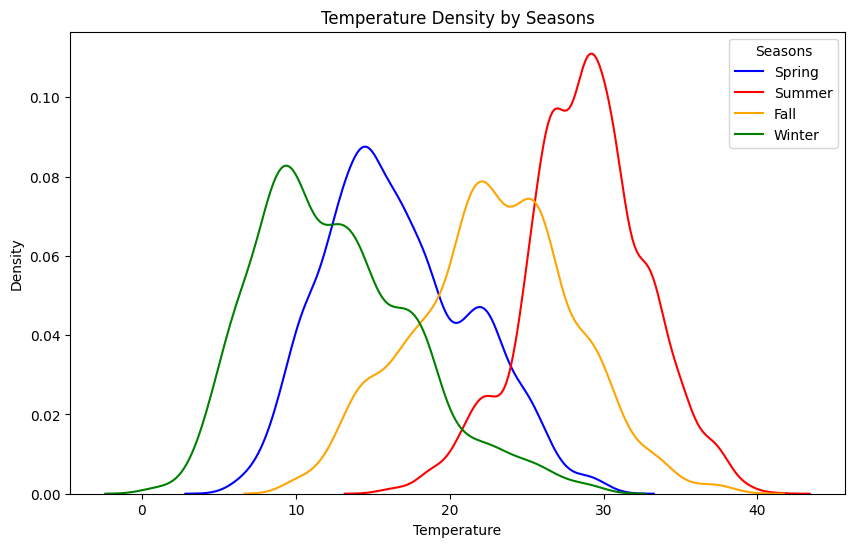

In [103]:
# Define custom colors for each season
season_colors = {
    'Spring': 'green',
    'Summer': 'orange',
    'Fall': 'red',
    'Winter': 'blue'
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Create a kernel density plot of temperature by season with custom colors
sns.kdeplot(data=train, x='temp', hue='season', common_norm=False, palette=season_colors.values())
plt.title('Temperature Density by Seasons')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.legend(title='Seasons', labels=season_colors.keys())

plt.show()

In [104]:
# Calculate the number of days in each season
days_in_season = train['season'].value_counts().sort_index()

# Display the number of days in each season
print("Number of days in each season:")
print(days_in_season)

Number of days in each season:
season
Fall      2733
Spring    2686
Summer    2733
Winter    2734
Name: count, dtype: int64


<Axes: ylabel='count'>

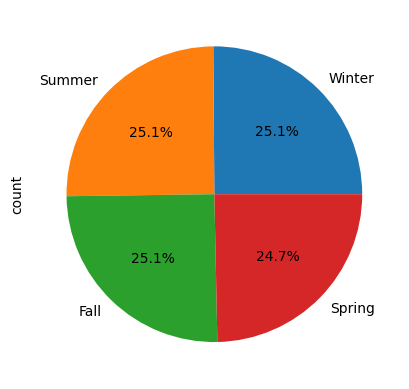

In [105]:
# Seeing the distribution of 'season' values in the train dataset
train['season'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

In [106]:
# Dropping unnecessary features that are not needed for modeling or have minimal impact
train.drop(['datetime', 'atemp', 'windspeed', 'casual', 'registered'], axis=1, inplace=True)

In [107]:
# One hot Endocing .
train = pd.get_dummies(train, columns=['season', 'weather', 'month', 'day'])

# Label Encoding.
label_encoder = LabelEncoder()

for i in ['holiday', 'workingday', 'year']:
    train[i] = label_encoder.fit_transform(train[i])

In [108]:
#Normalization

# List of columns to scale
columns_to_scale = ['temp', 'humidity', 'hour']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler on the selected columns to calculate mean and standard deviation
scaler.fit(train[columns_to_scale])

# Transform the selected columns using the calculated mean and standard deviation
train[columns_to_scale] = scaler.transform(train[columns_to_scale])



In [109]:
train.hour

0       -1.668944
1       -1.524341
2       -1.379739
3       -1.235137
4       -1.090534
           ...   
10881    1.078500
10882    1.223102
10883    1.367704
10884    1.512307
10885    1.656909
Name: hour, Length: 10886, dtype: float64

In [110]:
# Split data into x and y.
X = train.drop("count", axis=1)
y = train["count"]

# Split train data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
# Define the Root Mean Squared Logarithmic Error (RMSLE) scorer
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, np.clip(y_pred, 0, None)))

# Make the RMSLE scorer
rmsle_scorer = make_scorer(rmsle)

In [112]:
# Initialize and evaluate different regression models using cross-validation
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

In [113]:
train.head()

,holiday,workingday,temp,humidity,count,year,hour,season_Fall,season_Spring,season_Summer,...,month_November,month_October,month_September,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,1,0,-1.333661,0.994113,16,0,-1.668944,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,1,0,-1.438907,0.941651,40,0,-1.524341,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,1,0,-1.438907,0.941651,32,0,-1.379739,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,1,0,-1.333661,0.679340,13,0,-1.235137,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,1,0,-1.333661,0.679340,1,0,-1.090534,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [114]:
# Iterate over each model and Perform cross-validation with RMSLE scorer
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, scoring=rmsle_scorer, cv=5)
    
    print(f"Model: {model_name}")
    print(f"Average RMSLE: {np.mean(cv_scores)}\n")

Model: Linear Regression
Average RMSLE: 1.2990139388657433

Model: Decision Tree
Average RMSLE: 0.4263431493647104

Model: Random Forest
Average RMSLE: 0.3346707998770913



In [115]:
# Fit and evaluate the best model on the test set
the_model = RandomForestRegressor()  
the_model.fit(X_train, y_train)

y_pred = the_model.predict(X_test)
test_rmsle = rmsle(y_test, y_pred)
print(f"Test RMSLE for the best model: {test_rmsle}")

Test RMSLE for the best model: 0.32480330607547153


In [116]:
# Seeing if there are dublicated.
test.duplicated().sum()

0

In [117]:
# Convert the 'datetime' column to datetime format  
test['datetime'] = pd.to_datetime(test['datetime'])

# Extract the year from the 'datetime' column and create a new 'year' column
test['year'] = test['datetime'].dt.year

# Extract the month as its name from the 'datetime' column and create a new 'month' column
test['month'] = test['datetime'].dt.month_name()

# Extract the day as its name from the 'datetime' column and create a new 'day' column
test['day'] = test['datetime'].dt.day_name()

# Extract the hour from the 'datetime' column and create a new 'hour' column
test['hour'] = test['datetime'].dt.hour

In [118]:
# Replace the values in the 'season' column with corresponding strings
test['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)

# Replace the values in the 'holiday' column with corresponding strings
test['holiday'].replace({1: 'Holiday', 0: 'Not Holiday'}, inplace=True)

# Replace the values in the 'workingday' column with corresponding strings
test['workingday'].replace({1: 'Workingday', 0: 'Not Workingday'}, inplace=True)

# Replace the values in the 'weather' column with corresponding strings
test['weather'].replace({1: 'Clear', 2: 'Mist', 3: 'Rain', 4: 'Snow'}, inplace=True)

In [119]:
# Define a mapping dictionary to combine the clusters
cluster_mapping = {"Snow" : "Rain"}

# Update the "grade" column with the new cluster labels
test['weather'] = test['weather'].replace(cluster_mapping)

In [120]:
# Numerical columns.
numerical_features = test[['temp', 'atemp', 'humidity', 'windspeed']]

# calculate descriptive statistics for numerical values.
numerical_features.describe()

,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000
mean,20.620607,24.012865,64.125212,12.631157
std,8.059583,8.782741,19.293391,8.250151
min,0.820000,0.000000,16.000000,0.000000
25%,13.940000,16.665000,49.000000,7.001500
50%,21.320000,25.000000,65.000000,11.001400
75%,27.060000,31.060000,81.000000,16.997900
max,40.180000,50.000000,100.000000,55.998600


In [121]:
# Replace zero 'windspeed' with the values above or below
test['windspeed'] = test['windspeed'].replace(0, method='ffill').replace(0, method='bfill')

C:\Users\User\AppData\Local\Temp\ipykernel_5380\1465471323.py:2: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  test['windspeed'] = test['windspeed'].replace(0, method='ffill').replace(0, method='bfill')


In [122]:
#Store the datetime column in a separate variable.
datetime = test['datetime']

In [123]:
test.drop(['datetime', 'atemp', 'windspeed'], axis=1, inplace=True)

In [124]:
# One hot Endocing .
test = pd.get_dummies(test, columns=['season', 'weather', 'month', 'day'])

# Label Encoding.
label_encoder = LabelEncoder()

for i in ['holiday', 'workingday', 'year']:
    test[i] = label_encoder.fit_transform(test[i])

In [125]:
# List of columns to scale
columns_to_scale = ['temp', 'humidity', 'hour']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler on the selected columns to calculate mean and standard deviation
scaler.fit(test[columns_to_scale])

# Transform the selected columns using the calculated mean and standard deviation
test[columns_to_scale] = scaler.transform(test[columns_to_scale])

In [126]:
# Generate predictions for the test data using RandomForestClassifier.
test_pred = the_model.predict(test)

In [127]:
# Create a submission DataFrame with the 'datetime' column and predicted rental counts.
submission = pd.DataFrame({'datetime': datetime, 'count': test_pred})

In [128]:
# Save the submission DataFrame as a CSV file without including the index column.
submission.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
